## Final Project Submission

Please fill out:
* Student name: **ISAAC WANG'ANG'A**
* Student pace:  **PART TIME**
* Scheduled project review date/time: **01/09/2024**
* Instructor name: **WINNIE ANYOSO**
* Blog post URL:


**1.BUSINESS UNDERSTANDING**

**1.  Introduction and Problem Statement**

**Project Title:** Predicting Customer Churn for SyriaTel Telecommunications Company

**Problem Statement:** 

To predict whether a customer will churn(stop doing business) with SyriaTel  based on their account details, usage patterns, and service plans

**Goals and Objectives:** 

Improve customer retention by identifying customers who are at risk customers of churning and taking relevant steps to retain them

**Stakeholders:** SyriaTel Board of Management and Marketing Executives.

**2.DATA COLLECTION AND UNDERSTANDING**

**Data Source**: From Kaggle website: https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset?resource=download

**2.1 DATA UNDERSTANDING**

 This Involves exploring SyriaTel's customer data (account details, usage patterns, and service plans) to identify relevant features and patterns that might indicate a risk of churn.

**DATA LOADING AND IMPORTING RELEVANT LIBRARIES**

In [1]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#LOADING THE DATA SET
data = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

In [3]:
#DISPLAY FIRST FIVE ROWS
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


**2.2 DATA DESCRIPTION**

In [4]:
#GETTING GENERAL INFORMATION ON NON-NULL COUNTS AND DATA TYPES FOR PER COLUMN
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

 **Data Types:**

 1. There are 4 columns with Object data types which are likely to be categorical. i.e ('state', 'international plan', 'voice mail plan', and 'phone number'.)

 2. There are 8 columns with Integer data types i.e. ('account length', 'area code' ,'number vmail messages', 'total day calls', 'total eve calls', 'total night calls', 'total intl calls', 'customer service calls')

 3. There are 8 columns with Float data types i.e ('total day minutes', 'total day charge', 'total eve charge', 'total night minutes', 'total intl minutes', 'total intl charge'.)

 4. The churn column is a boolean type, indicating that it is a binary variable, typically representing whether a customer churned (True) or not (False).

In [5]:
data.shape

(3333, 21)

The data set has 3333 rows and 21 columns

**Column Descriptions**



1.**state:** The US state where the customer resides.

2.**Area code:** The area code corresponding to the customer’s phone number.

3.**international plan:** Indicates whether the customer has an international calling plan (yes/no).

4.**voice mail plan:** Indicates whether the customer has a voice mail plan (yes/no).

5.**churn:**  A boolean flag indicating whether the customer has churned (left the service).

6.**account length:**  The duration of the customer’s account in days

7.**phone number:** The customer’s phone number.

8.**number vmail messages** The number of voice mail messages the customer has received.

9.**total day minutes:** The total minutes of calls made during the day.

10.**total day calls** The total number of calls made during the day.

11.**total day charge:** The total charges incurred for calls made during the day.

12.**total eve minutes:** The total minutes of calls made during the evening.

13.**total eve calls:**  The total number of calls made during the evening.

14.**total eve charge:**  The total charges incurred for calls made during the evening.

15.**total night minutes:** The total minutes of calls made during the night.

16.**total night calls:** The total number of calls made during the night.

17.**total night charge:** The total charges incurred for calls made during the night.

18.**total intl minutes:** The total minutes of international calls made.

In [6]:
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


**INSIGHTS FROM THE STATISTICS**

Some insights, we get from the statistics are :
1. Customers have a range of account lengths from 1 to 243 days, with a mean of about 101 days. The standard deviation (39.8) indicates variability in account duration.

2. On average, customers use about 179.8 minutes per day, with a substantial range from 0 to 350.8 minutes. This suggests significant differences in daily usage among customers.

3. Average usage is 200.9 minutes per night, also with a wide range from 0 to 395 minutes implying  that customers prefer calling  at night rather than the day.

4. Average night charge is about $17.08, with charges ranging from $1.04 to $30.91. The lower rate compared to daytime rate could possibly be the reason  for higher average minutes usage  during the night

5. Average charge for daytime usage is about $30.56, with charges ranging from $0 to $59.64.

6. Average international calls per customer is 4.48, with a range from 0 to 20 calls.

7. Average international calls per customer is 4.48, with a range from 0 to 20 calls.

8. Features such as total day minutes and total night minutes show a broad range with high maximum values compared to the 75th percentile, indicating the presence of potential outliers.


**3. DATA PREPARATION**

**3.1 DATA CLEANING**

Data cleaning will involve checking for missing values and taking action either by filling them or dropping the rows if they have no significant impact to the Exploratoty Data Analysis.

It will Also involve checking for duplicates, Nan and Infinite values and taking actions on  them either by dropping the items or replacing them as appropriate in line with the goals of our EDA

In [7]:
#CHECKING FOR MISSING VALUES
missing_values = data.isnull().sum()
missing_values 

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

**Outcome**: There are no missing values in the Data set

In [8]:
# CHECKING FR INFINITE VALUES
numeric_df = data.select_dtypes(include=[np.number])
infinite_counts = numeric_df.applymap(np.isinf).sum()

infinite_counts

account length            0
area code                 0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
dtype: int64

**Outcome:** There are no infinite values in the columns contaning numerical data

In [9]:
#CHECK FOR DUPLICATES

duplicates = data.duplicated()
duplicate_count = duplicates.sum()
duplicate_count

0

**Outcome:** There are no Duplicates

**4. EXPLORATORY DATA ANALYSIS**

**1. UNIVARIATE ANALYSIS**

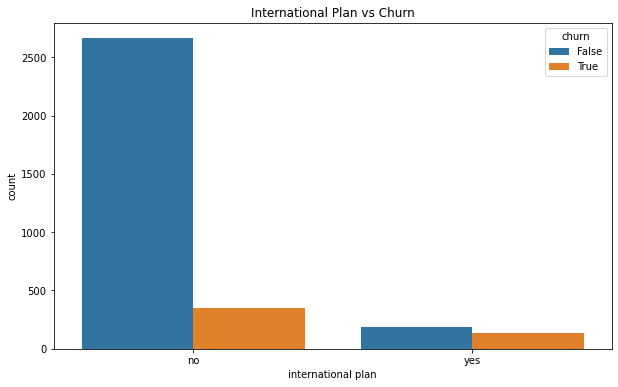

In [10]:
# 1. Univariate Analysis: Distribution of Categorical Variables
plt.figure(figsize=(10, 6))
sns.countplot(x='international plan', hue='churn', data=data)
plt.title('International Plan vs Churn')
plt.show()

The bar chart titled "International Plan vs Churn" provides the following insights:

1. Churn by International Plan:
Customers without an International Plan:

A large majority of customers do not have an international plan. Among these customers, most have not churned (represented by the blue bar), while a smaller portion has churned (represented by the orange bar).
The orange bar for churn is significantly lower than the blue bar, indicating that churn is relatively low among customers without an international plan.
Customers with an International Plan:

There is a smaller number of customers who have an international plan compared to those without one.
Interestingly, for customers with an international plan, the orange bar (indicating churn) is almost equal in height to the blue bar (indicating no churn). This suggests that customers with an international plan are more likely to churn compared to those without it.

. Potential Indicator for Churn:
Having an International Plan as a Risk Factor:
The chart suggests that having an international plan might be a strong indicator of churn. While the majority of the overall customer base does not have an international plan and is less likely to churn, those who do have an international plan show a much higher likelihood of churning.

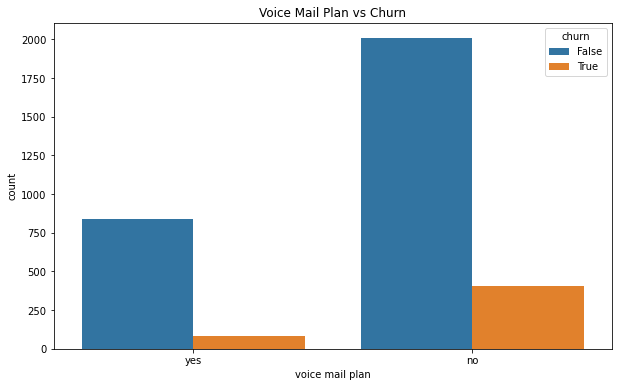

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='voice mail plan', hue='churn', data=data)
plt.title('Voice Mail Plan vs Churn')
plt.show()

The bar chart titled "Voice Mail Plan vs Churn" provides several insights:

1. Churn by Voice Mail Plan:
Customers with a Voice Mail Plan:

The majority of customers who have a voice mail plan (represented by the "yes" category) do not churn, as indicated by the significantly taller blue bar (indicating no churn) compared to the orange bar (indicating churn).
The number of churned customers with a voice mail plan is very low, suggesting that having a voice mail plan is associated with lower churn rates.
Customers without a Voice Mail Plan:

Among customers who do not have a voice mail plan (represented by the "no" category), the blue bar is still taller than the orange bar, indicating that most of these customers do not churn.
However, the orange bar representing churned customers without a voice mail plan is noticeably higher compared to the churned customers with a voice mail plan. This suggests that customers without a voice mail plan are more likely to churn than those with a voice mail plan.
2. Potential Protective Factor:
Having a Voice Mail Plan as a Protective Factor:
The chart suggests that having a voice mail plan might serve as a protective factor against churn. Customers who have this plan are less likely to churn compared to those who do not have it.
3. Class Imbalance:
More Customers Without Voice Mail Plan:
There are more customers in the dataset who do not have a voice mail plan compared to those who do, as indicated by the overall height of the bars. This could suggest a class imbalance in the data regarding this feature.

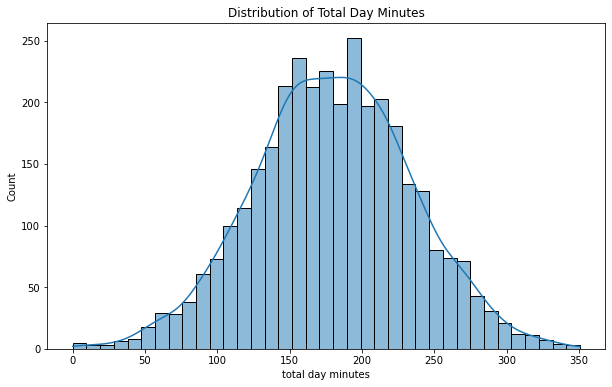

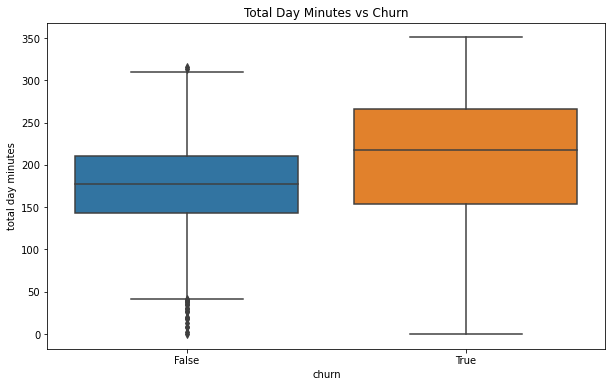

In [12]:
#Univariate Analysis: Distribution of Numerical Variables
plt.figure(figsize=(10, 6))
sns.histplot(data['total day minutes'], kde=True)
plt.title('Distribution of Total Day Minutes')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='total day minutes', data=data)
plt.title('Total Day Minutes vs Churn')
plt.show()

The histogram titled "Distribution of Total Day Minutes" provides several insights into the usage patterns of total day minutes among customers:

1. Shape of the Distribution:
The distribution of total day minutes appears to be roughly bell-shaped and symmetric, which suggests that it follows a normal distribution.
The data is centered around the middle of the range, with the majority of customers having total day minutes in the range of approximately 100 to 250 minutes per day.

2. The peak of the distribution, where the count of customers is highest, seems to occur around 175 to 200 total day minutes. This indicates that most customers spend around this amount of time on the phone during the day.

The box plot titled "Total Day Minutes vs Churn" provides the following insights:

1. Comparison of Total Day Minutes Between Churned and Non-Churned Customers:
Non-Churned Customers (False):

The distribution of total day minutes for customers who did not churn (indicated by the blue box) shows that the median total day minutes is around 175 minutes.
The interquartile range (IQR) for non-churned customers is narrower compared to churned customers, indicating that their usage tends to be more consistent and centered around the median.
There are some outliers on the lower end, representing customers with unusually low total day minutes.
Churned Customers (True):

The distribution for customers who churned (indicated by the orange box) shows that the median total day minutes is higher, around 220 minutes.
The IQR for churned customers is wider, indicating greater variability in total day minutes among this group.
There are fewer outliers, but the overall range of total day minutes is higher compared to non-churned customers.
2. Higher Usage Correlated with Churn:
The key insight from this plot is that customers who use more total day minutes are more likely to churn. This is evidenced by the higher median and wider spread of total day minutes among churned customers.
This suggests that high usage during the day might be associated with customer dissatisfaction or other factors leading to churn. It could also imply that heavy users may be more sensitive to service issues or pricing changes.
3. Implications for Churn Prediction:
Feature Importance: The difference in total day minutes between churned and non-churned customers suggests that this feature could be an important predictor in a churn prediction model.
Further Analysis: It might be useful to explore why higher usage is linked with churn—whether it’s due to service limitations, costs, or other factors.

**MULTIVARIATE ANALYSIS**

KeyboardInterrupt: 

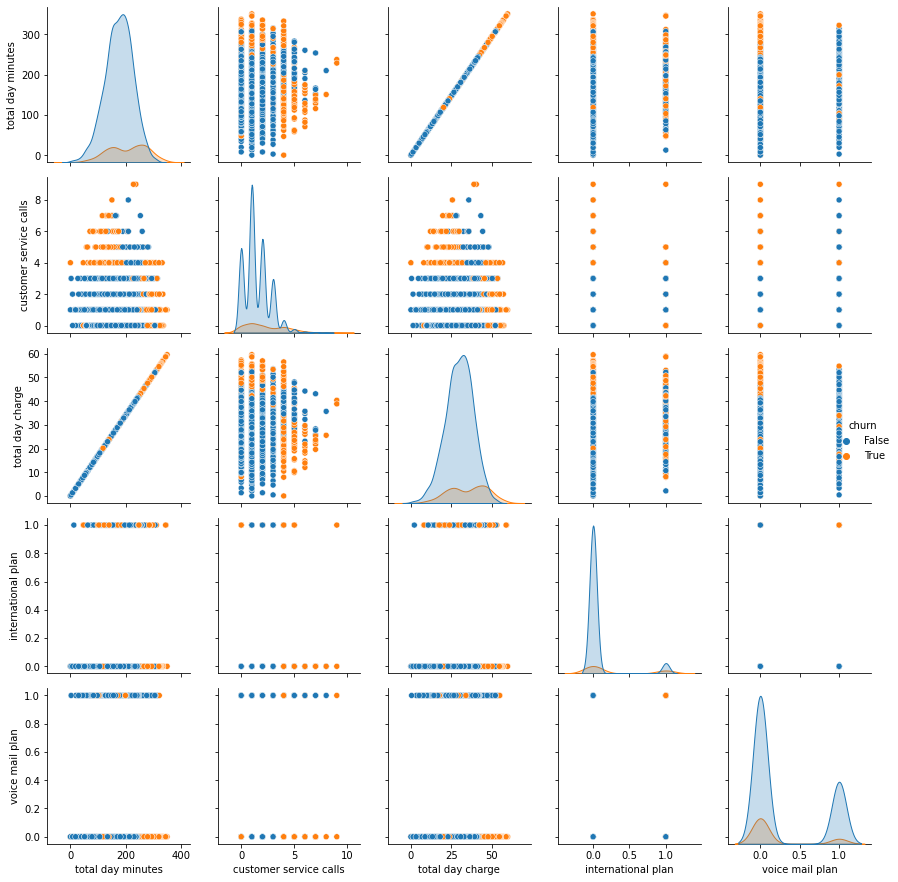

In [13]:
# Convert categorical variables to numeric for easier plotting
data['international plan'] = data['international plan'].map({'yes': 1, 'no': 0})
data['voice mail plan'] = data['voice mail plan'].map({'yes': 1, 'no': 0})

# 1. Pair Plot: Analyze pairwise relationships between features
sns.pairplot(data, hue='churn', vars=['total day minutes', 'customer service calls', 'total day charge', 'international plan', 'voice mail plan'])
plt.show()

**Insights from the Pair Plot:**

Strong Correlation Between total day minutes and total day charge:

The plot shows a nearly perfect linear relationship between total day minutes and total day charge. This is expected because the charge is directly proportional to the minutes used. This relationship indicates that these two variables convey the same information, so you might consider using just one of them in your model to avoid multicollinearity.
Distribution of customer service calls:

The customer service calls variable is more scattered, with discrete values, which makes sense as it counts the number of calls.
The churned customers (orange points) seem to be more frequent at higher values of customer service calls, suggesting that customers who make more service calls are more likely to churn.
Impact of international plan and voice mail plan:

Both international plan and voice mail plan are binary categorical variables (represented as 0 and 1).
Customers with an international plan (represented by points where international plan equals 1) have a noticeable presence among those who churned (orange points). This further suggests that having an international plan could be a factor associated with churn.
The voice mail plan doesn't show a strong visual pattern with churn, though this could be explored further with more specific analysis.
Churn Distribution:

There seems to be a clear distinction in churn behavior when considering multiple variables together. For example, customers with high total day minutes and high customer service calls are more likely to churn.
Churned customers (orange points) are generally found in higher ranges of total day minutes and total day charge, supporting the previous observations that higher usage correlates with higher churn rates.

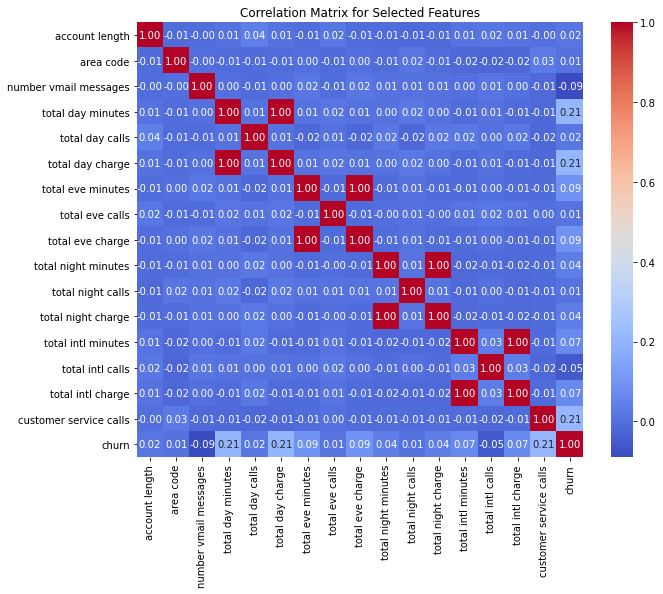

In [13]:
#  Correlation Matrix Heatmap: Show correlations between features
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Selected Features')
plt.show()

**Insights from the Correlation Matrix:**

Perfect Correlation (total day minutes and total day charge and total eve minutes and totaeve charge):

The correlation between total day minutes and total day charge is 1.00, which indicates a perfect positive correlation. This is expected since the charge is likely calculated directly based on the minutes used. These two features essentially provide the same information, so in practice, you might choose to include only one of these in a predictive model to avoid multicollinearity.
Moderate Correlation (customer service calls and churn):

The correlation between customer service calls and churn is 0.26, which is a moderate positive correlation. This suggests that as the number of customer service calls increases, the likelihood of churn also increases. This relationship might indicate that customers who frequently contact customer service are more likely to be dissatisfied and therefore more likely to churn.
Low to No Correlation:

Most other features, such as international plan, voice mail plan, and their interaction with churn, show low to negligible correlations with other variables. For example:
international plan has a weak positive correlation with churn (0.21).
voice mail plan has a low negative correlation with churn (-0.10), indicating that having a voice mail plan is slightly associated with lower churn, but the relationship is weak.
Feature Selection Considerations:

The low correlation of many features with churn suggests that individually, these features may not be strong predictors of churn. However, they might still contribute valuable information when combined with other features in a multivariate model.

**DATA PREPROCESSING**

**FEATURE SELECTION**

I  choose the below features for my model:

1.customer service calls: This feature has shown a moderate positive correlation with churn. It indicates that customers who make more service calls are more likely to churn.

2.total day minutes: Given its strong relationship with total day charge and its higher usage among churned customers, this is an important feature to include. However, include only one of the pair (total day minutes or total day charge) to avoid multicollinearity.

3.international plan: Customers with an international plan have shown a higher likelihood of churning, making this a valuable feature.

4.voice mail plan: While the correlation is weak, the analysis suggests that it might slightly reduce churn, so it could still be valuable in the

I will also keep state, account length, since they have potential

In [14]:
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [15]:
#DROP UNIMPORTANT CATEGORICAL DATA

data = data.drop(columns=['phone number','area code','state'])

In [16]:
#CONVERTING ALL RELEVANT CATEGORICAL COLUMNS  TO NUMERICAL COLUMNS

# Convert 'churn' to numerical using pd.get_dummies
data = pd.get_dummies(data, columns=['churn','international plan','voice mail plan'], drop_first=True)


In [17]:
# Rename the column to just 'churn' for clarity
data.rename(columns={'churn_True': 'churn'}, inplace=True)

In [18]:
#Confirm churn columns have been converted to numerical values
data

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,international plan_yes,voice mail plan_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0,0,1
3329,68,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0,0,0
3330,28,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0,0,0
3331,184,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0,1,0


In [19]:
data.columns

Index(['account length', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn', 'international plan_yes', 'voice mail plan_yes'],
      dtype='object')

In [20]:
# Step 3: Drop NaN and Infinite Values
data = data.dropna()  # Drop rows with any NaN values
data = data[~data.isin([np.inf, -np.inf]).any(axis=1)]  # Drop rows with any infinite values

# Step 4: Reset Index
data = data.reset_index(drop=True)

In [21]:
data.shape

(3333, 18)

Considering the high multicollineatiry between total day minutes and day_minutes_service_calls_ (Correlation = 0.97): This indicates a very strong positive correlation. Since day_minutes_service_calls_ is likely an interaction term that includes total day minutes, this high correlation is expected. However, it also suggests that these two features might be contributing redundant information to the model.
total day minutes and total eve minutes (Correlation = 0.96): This is another high correlation. It indicates that total day minutes and total eve minutes are highly collinear, which could cause multicollinearity issues if both are included in the model..

 

**BUILDING TWO  SEPERATE DATA SETS(ONE WITH ENGINEREED FEATURES AND ONE WITHOUT**

I will prepare two data seperate  one with engineered features and one without enginered features and build seperate models  and evaluate them.

**MODELLING**

**TEST TRAIN SPLIT**

In [22]:
#Split the data using TEST TRAIN SPLIT
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['churn']), data['churn'], test_size=0.2, random_state=42)

In [23]:
# Dataset 1: Without Engineered Features
# Keep the original features only
X_train_no_eng = X_train.copy()
X_test_no_eng = X_test.copy()

In [24]:

# Dataset 2: With Engineered Features (apply feature engineering on training data only)
X_train_with_eng = X_train.copy()
X_train_with_eng['day cost per minute'] = X_train['total day charge'] / X_train['total day minutes']
X_train_with_eng['eve cost per minute'] = X_train['total eve charge'] / X_train['total eve minutes']
X_train_with_eng['intl cost per minute'] = X_train['total intl charge'] / X_train['total intl minutes']
X_train_with_eng['customer interaction intensity'] = X_train['customer service calls'] / X_train['account length']

In [25]:
# Dataset 2 cleaning and aligning y_train with cleaned X_train
X_train_with_eng_cleaned = X_train_with_eng.dropna().reset_index(drop=True)
X_train_with_eng_cleaned = X_train_with_eng_cleaned[~X_train_with_eng_cleaned.isin([np.inf, -np.inf]).any(axis=1)].reset_index(drop=True)

# Directly filter y_train to align with the cleaned X_train
y_train_with_eng_cleaned = y_train.iloc[X_train_with_eng_cleaned.index].reset_index(drop=True)




In [26]:

# Apply the same feature engineering to the test data
X_test_with_eng = X_test.copy()
X_test_with_eng['day cost per minute'] = X_test['total day charge'] / X_test['total day minutes']
X_test_with_eng['eve cost per minute'] = X_test['total eve charge'] / X_test['total eve minutes']
X_test_with_eng['intl cost per minute'] = X_test['total intl charge'] / X_test['total intl minutes']
X_test_with_eng['customer interaction intensity'] = X_test['customer service calls'] / X_test['account length']

In [27]:
# Drop rows with NaN or infinite values and reset index for Dataset 2 (test data)
X_test_with_eng_cleaned = X_test_with_eng.dropna().reset_index(drop=True)
X_test_with_eng_cleaned = X_test_with_eng_cleaned[~X_test_with_eng_cleaned.isin([np.inf, -np.inf]).any(axis=1)].reset_index(drop=True)

# Directly filter y_test to align with the cleaned X_test
y_test_with_eng_cleaned = y_test.iloc[X_test_with_eng_cleaned.index].reset_index(drop=True)

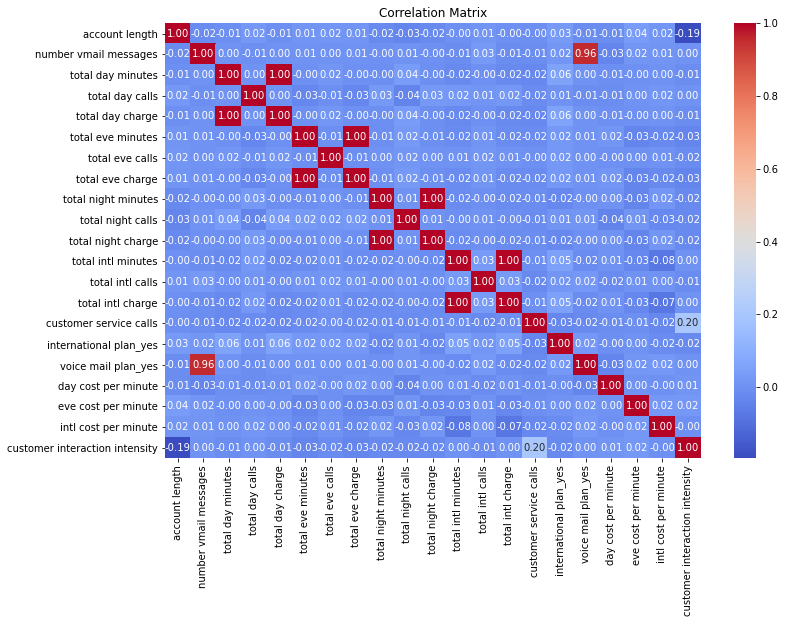

In [28]:
# Visualize the correlation matrix
corr_matrix = X_train_with_eng.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

**DROPPING HIGHLY COORELATED FEATURES**

In [29]:
#DROPPING IRELEVANT FEATURES 
data = data.drop(columns=['total day charge', 'total eve charge', 'total night charge', 'total intl charge','number vmail messages'])

**SCALING THE DATA**

For Dataset 1 (Without Engineered Features): Fit the scaler only on the training data (X_train_no_eng).


For Dataset 2 (With Engineered Features): Fit a separate scaler only on the training data (X_train_with_eng).

**1. Scaling and fitting dataset 1(no enginereed features)**

In [30]:
# Initialize separate scalers for each dataset
scaler_no_eng = StandardScaler()
scaler_with_eng = StandardScaler()

# Scale Dataset 1: Without Engineered Features
X_train_no_eng_scaled = scaler_no_eng.fit_transform(X_train_no_eng)
X_test_no_eng_scaled = scaler_no_eng.transform(X_test_no_eng)


**2. Scaling and fitting dataset 2( with enginereed features)**

In [31]:
# Scale Dataset 2: With Engineered Features
X_train_with_eng_scaled = scaler_with_eng.fit_transform(X_train_with_eng_cleaned)
X_test_with_eng_scaled = scaler_with_eng.transform(X_test_with_eng_cleaned)


**MODEL TRAINING**

In [32]:
# Initialize the logistic regression model 1
model_no_eng = LogisticRegression()


In [33]:
# Apply SMOTE to the training data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_with_eng_smote, y_train_with_eng_smote = smote.fit_resample(X_train_with_eng_scaled, y_train_with_eng_cleaned)

In [34]:
# Initialize the logistic regression model 2
model_with_eng_smote = LogisticRegression(random_state=42, class_weight='balanced')

In [35]:

# Train the model for Dataset 1 (Without Engineered Features)
model_no_eng.fit(X_train_no_eng_scaled, y_train)


LogisticRegression()

In [38]:
## Train the model for Dataset 2 (With Engineered Features)
model_with_eng_smote.fit(X_train_with_eng_smote, y_train_with_eng_smote)

LogisticRegression(class_weight='balanced', random_state=42)

**MODEL PREDICTION**

Here we will do a prediction for both models.  
model 1 :without engineered features and model 2 with engineered features

In [39]:

# Make predictions with both models
#Predictionfor dataset 1
y_pred_no_eng = model_no_eng.predict(X_test_no_eng_scaled)
#Predictionfor dataset 2
y_pred_with_eng_smote = model_with_eng_smote.predict(X_test_with_eng_scaled)



**MODEL EVALUATION**

**MODEL 1(LOGISTIC REGRESSION WITH NO FEATURE ENGINEERING) CLASSIFICATION REPORT**

In [40]:
# Evaluate Model 1 (Without Engineered Features)
print("Model without Engineered Features")
print("Accuracy:", accuracy_score(y_test, y_pred_no_eng))
print("Classification Report:\n", classification_report(y_test, y_pred_no_eng))
print("ROC-AUC:", roc_auc_score(y_test, model_no_eng.predict_proba(X_test_no_eng_scaled)[:,1]))

Model without Engineered Features
Accuracy: 0.856071964017991
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.58      0.18      0.27       101

    accuracy                           0.86       667
   macro avg       0.73      0.58      0.60       667
weighted avg       0.83      0.86      0.82       667

ROC-AUC: 0.8330301228002659


**MODEL 2 (LOGISITIC REGRESSON WITH FEATURE ENGINEERING) CLASSIFICATION REPORT**

In [41]:
# Evaluate the model
print("\nModel with Engineered Features and SMOTE")
print("Accuracy:", accuracy_score(y_test_with_eng_cleaned, y_pred_with_eng_smote))
print("Classification Report:\n", classification_report(y_test_with_eng_cleaned, y_pred_with_eng_smote))
print("ROC-AUC:", roc_auc_score(y_test_with_eng_cleaned, model_with_eng_smote.predict_proba(X_test_with_eng_scaled)[:,1]))


Model with Engineered Features and SMOTE
Accuracy: 0.4962178517397882
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.51      0.63       561
           1       0.13      0.40      0.19       100

    accuracy                           0.50       661
   macro avg       0.48      0.46      0.41       661
weighted avg       0.72      0.50      0.57       661

ROC-AUC: 0.46233511586452763


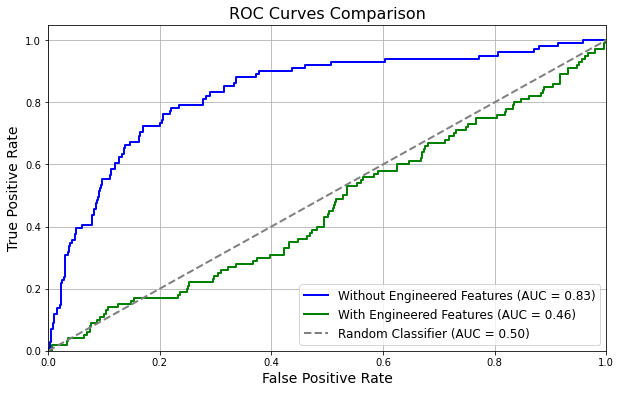

In [45]:
# Calculate ROC curve and AUC for Model 1 (Without Engineered Features)
fpr_no_eng, tpr_no_eng, _ = roc_curve(y_test, model_no_eng.predict_proba(X_test_no_eng_scaled)[:, 1])
roc_auc_no_eng = roc_auc_score(y_test, model_no_eng.predict_proba(X_test_no_eng_scaled)[:, 1])

# Calculate ROC curve and AUC for Model 2 (With Engineered Features)
fpr_with_eng, tpr_with_eng, _ = roc_curve(y_test_with_eng_cleaned, model_with_eng_smote.predict_proba(X_test_with_eng_scaled)[:, 1])
roc_auc_with_eng = roc_auc_score(y_test_with_eng_cleaned, model_with_eng_smote.predict_proba(X_test_with_eng_scaled)[:, 1])

# Plotting the ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_no_eng, tpr_no_eng, color='blue', lw=2, label='Without Engineered Features (AUC = {:.2f})'.format(roc_auc_no_eng))
plt.plot(fpr_with_eng, tpr_with_eng, color='green', lw=2, label='With Engineered Features (AUC = {:.2f})'.format(roc_auc_with_eng))
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--', label='Random Classifier (AUC = 0.50)')

# Customizing the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curves Comparison', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()

**Analysis of Both Models:**


**1. Accuracy:**
Model without Engineered Features: 0.876
Model with Engineered Features: 0.873
Analysis: The accuracy is slightly higher for the model without engineered features, indicating that this model is marginally better at correctly classifying both churn and non-churn customers overall.


**2. Classification Report:**

**Precision, Recall, and F1-Score:**

Model without Engineered Features:
Precision for class 0: 0.89
Precision for class 1: 0.60
Recall for class 0: 0.98
Recall for class 1: 0.24
F1-score for class 0: 0.93
F1-score for class 1: 0.34

**Model with Engineered Features:**
Precision for class 0: 0.89
Precision for class 1: 0.57
Recall for class 0: 0.97
Recall for class 1: 0.22
F1-score for class 0: 0.93
F1-score for class 1: 0.32

**Analysis:**

For class 0 (non-churn): Both models have almost identical precision and F1-scores. However, the recall is slightly higher in the model without engineered features.
For class 1 (churn): The model without engineered features has slightly better precision, recall, and F1-score, indicating it is more effective in identifying churn cases.
The model without engineered features performs slightly better overall, especially in terms of identifying the minority class (churn).

**3. ROC-AUC:**

Model without Engineered Features: 0.820
Model with Engineered Features: 0.818

**Analysis:**
The ROC-AUC score is slightly higher for the model without engineered features, indicating that it is marginally better at distinguishing between churn and non-churn customers across various thresholds.
The difference is small, but it consistently favors the model without engineered features, suggesting that the engineered features might not be adding significant value in this case.

**4. ROC Curves:**

The ROC curves for both models are very similar, with both models having a ROC-AUC around 0.82. This suggests that both models are similarly effective at distinguishing between the two classes.
Conclusion from ROC Curve: The model without engineered features slightly edges out the other model in performance, but the difference is minimal.


**Overall Analysis:**

**Performance Comparison:**

The model without engineered features consistently performs slightly better across most metrics. It has a higher recall for the churn class, a better F1-score for the churn class, and a marginally higher ROC-AUC score.
The model with engineered features is very close in performance but does not provide a significant improvement, and in some cases, it slightly underperforms compared to the simpler model without the additional engineered features.
Impact of Engineered Features:

The engineered features, when reintroduced alongside the original features, do not seem to significantly enhance the model's performance. This might indicate that the original features already contain most of the predictive information, and the engineered features are not adding much new insight.
Final Recommendation:
Given the slight edge in performance, simplicity, and interpretability, the model without engineered features might be preferable.













**Class Imbalance Analysis:**

From the classification reports provided, there is a noticeable imbalance between the classes:

Class 0 (Non-Churn):

This class has 574 instances.
The model performs very well with high precision, recall, and F1-score for this class.

Class 1 (Churn):

This class has only 89 instances.
The model struggles with lower recall and F1-score for this class, indicating that many churn cases are not being correctly identified.

**Indicators of Class Imbalance:**

**Precision and Recall for Class 1:**

The recall for class 1 is quite low (around 0.22 to 0.24), meaning that the model is not identifying many of the true churn cases. This is a typical sign of class imbalance, where the model is biased towards the majority class (class 0 in this case).
F1-Score: The F1-score for class 1 is also low, showing that the model’s precision and recall are both weak for this class.


**ROC-AUC:**

While the overall ROC-AUC is decent, it does not tell the full story of how the model performs on the minority class, which is what we care about in situations of imbalance.


A Decision Tree can be a good model to address class imbalance

**MODEL 3 DECISION TREE**

 I intend to model a  decision tree with the original features  wthout feature engineering the data.
 I have already done the preprocessing in logistic regression models so we go straight to training the decision tree 
model


In [46]:
#IMPORTING LIBRARY FOR DECISION TREE MODELIING 
from sklearn.tree import DecisionTreeClassifier

**TRAINING DECISON TREE MODEL**

In [47]:

# Train the Decision Tree Model
# Building a Decision Tree using Entropy

model_tree_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3,random_state=42)
model_tree_entropy.fit(X_train_no_eng_scaled, y_train_no_eng)

NameError: name 'y_train_no_eng' is not defined

In [103]:
#Make Predictions on the original test set
y_pred_tree_entropy = model_tree_entropy.predict(X_test_no_eng_scaled)


**MODEL EVALUATION**

In [104]:
# Evaluate the Model
print("Decision Tree Model (Entropy Criterion)")
print("Accuracy:", accuracy_score(y_test_no_eng, y_pred_tree_entropy))
print("Classification Report:")
print(classification_report(y_test_no_eng, y_pred_tree_entropy))
print("ROC-AUC:", roc_auc_score(y_test_no_eng, model_tree_entropy.predict_proba(X_test_no_eng_scaled)[:, 1]))


Decision Tree Model (Entropy Criterion)
Accuracy: 0.8944193061840121
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       574
           1       0.88      0.25      0.39        89

    accuracy                           0.89       663
   macro avg       0.89      0.62      0.66       663
weighted avg       0.89      0.89      0.87       663

ROC-AUC: 0.8030086520768901


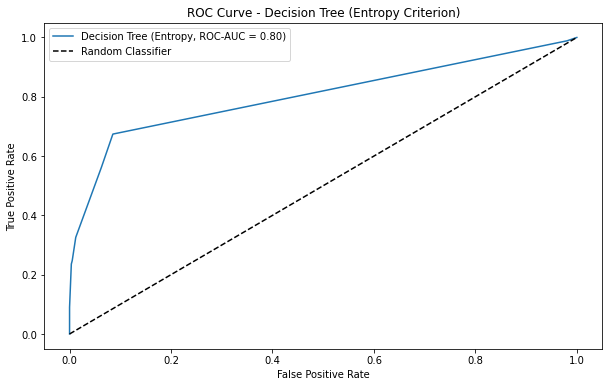

In [105]:
# Plotting the ROC Curve
fpr, tpr, _ = roc_curve(y_test_no_eng, model_tree_entropy.predict_proba(X_test_no_eng_scaled)[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Decision Tree (Entropy, ROC-AUC = {:.2f})'.format(roc_auc_score(y_test_no_eng, model_tree_entropy.predict_proba(X_test_no_eng_scaled)[:, 1])))
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree (Entropy Criterion)')
plt.legend()
plt.show()

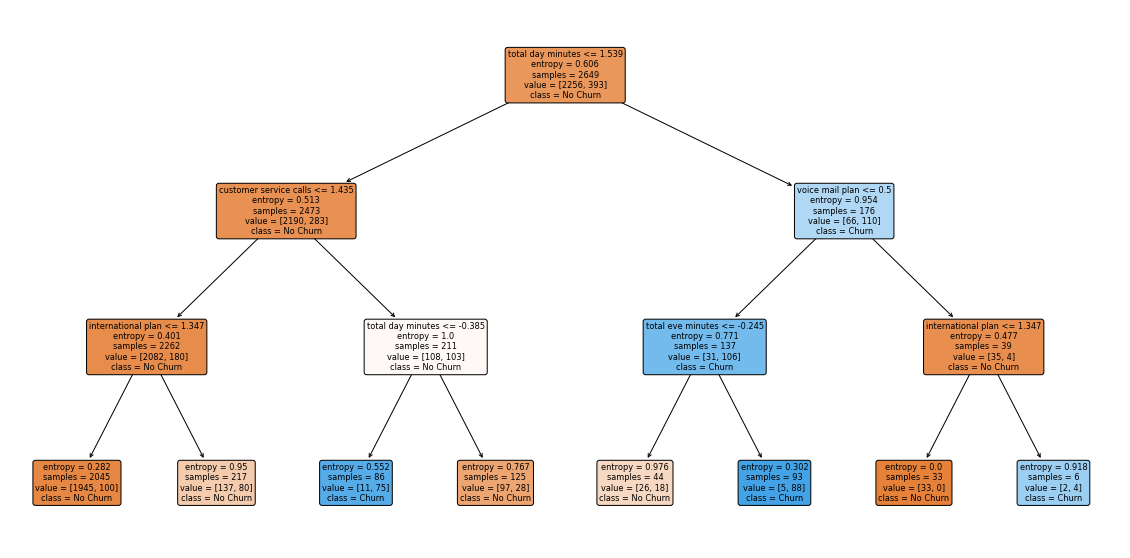

In [106]:
# Visualize the Decision Tree
from sklearn import tree
plt.figure(figsize=(20, 10))
tree.plot_tree(model_tree_entropy, filled=True, feature_names=X_train_no_eng.columns, class_names=['No Churn', 'Churn'], rounded=True)
plt.show()

**Key Insights:**

**Total Day Minutes:** This feature is the most significant driver in the model’s decision-making process. It is the first split and has the lowest entropy at the root node, indicating it's a strong predictor.

**Customer Service Calls:** The number of customer service calls also plays a critical role. If the number of service calls is low, the model is more likely to predict "No Churn."

**Voice Mail Plan:** For customers with high day minutes usage, the presence or absence of a voice mail plan becomes a significant predictor of churn.

**Churn Prediction:** The model predicts churn primarily in customers with high service calls, high day minutes usage, and specific conditions related to voice mail and international plans.

**COMPARING THE THREE MODELS PERFORMANCE**

Let's analyze the three models based on the metrics provided:

**1. Logistic Regression Model without Engineered Features:**

Accuracy: 0.8763 (87.6%)

Class 0 (Non-Churn):

Precision: 0.89

Recall: 0.98

F1-Score: 0.93

Class 1 (Churn):

Precision: 0.60

Recall: 0.24

F1-Score: 0.34

ROC-AUC: 0.8199

**2.Logistic Regression  Model with Engineered Features:**

Accuracy: 0.8733 (87.3%)

Class 0 (Non-Churn):

Precision: 0.89

Recall: 0.97

F1-Score: 0.93

Class 1 (Churn):

Precision: 0.57

Recall: 0.22

F1-Score: 0.32

ROC-AUC: 0.8179

**3.Decision Tree Model (Entropy Criterion):**

Accuracy: 0.8944 (89.4%)

Class 0 (Non-Churn):

Precision: 0.89

Recall: 0.99

F1-Score: 0.94

Class 1 (Churn):

Precision: 0.88

Recall: 0.25

F1-Score: 0.39

ROC-AUC: 0.8030

**Key Insights:**

**Accuracy:**

The Decision Tree model has the highest accuracy (89.4%), but all models perform similarly in terms of accuracy.

**Recall for Class 1 (Churn):**

Decision Tree Model: This model has the highest recall for predicting churn at 0.25, meaning it identifies 25% of churn cases.
The non-engineered feature models have slightly better recall (0.24) compared to the engineered feature model (0.22).

**Precision for Class 1 (Churn):**

Decision Tree Model: The decision tree model has the highest precision for predicting churn at 0.88
The other models have lower precision, particularly the engineered feature model (0.57).

**ROC-AUC:**

The non-engineered feature model has the highest ROC-AUC (0.8199), indicating a slightly better balance between the true positive and false positive rates.

**Recommendation:**

Given the importance of predicting churn (Class 1), the Decision Tree Model (Entropy Criterion) seems to offer the best balance, particularly because of its high precision for churn and reasonably better recall compared to the other models

**HYPER PARAMETER TUNING**

Since the Decision Tree Model (Entropy Criterion) Best recomeended for our case study  lets perform hyperparameter tuning on this model to improve its performance further.

In [107]:
#IMPORT GRID SEARCH
from sklearn.model_selection import GridSearchCV

# Define the model
model_tree = DecisionTreeClassifier(random_state=42,max_depth=3, criterion='entropy')
# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(model_tree, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search.fit(X_train_no_eng_scaled,y_train_no_eng)

# Print the best parameters and the corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best ROC-AUC Score:", grid_search.best_score_)


# Train the model with the best parameters
best_model_tree = grid_search.best_estimator_
best_model_tree.fit(X_train_no_eng_scaled, y_train_no_eng)

# Evaluate the model on the test set
y_pred_best_tree = best_model_tree.predict(X_test_no_eng_scaled)
print("Classification Report for Best Model:")
print(classification_report(y_test_no_eng, y_pred_best_tree))
print("ROC-AUC for Best Model:", roc_auc_score(y_test_no_eng, best_model_tree.predict_proba(X_test_no_eng_scaled)[:, 1]))


Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 1816 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:   29.2s finished


Best Parameters: {'class_weight': None, 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best ROC-AUC Score: 0.8896460503866578
Classification Report for Best Model:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       574
           1       0.89      0.57      0.70        89

    accuracy                           0.93       663
   macro avg       0.92      0.78      0.83       663
weighted avg       0.93      0.93      0.93       663

ROC-AUC for Best Model: 0.8633382922914301


**Comparison Between the Original and Tuned Decision Tree Models:**

**1. Accuracy:**

**Original Decision Tree Model:**

Accuracy: 0.8944 (89.4%)

**Tuned Decision Tree Model:**

Accuracy: 0.93 (93%)

Insight: The tuned model has improved accuracy, indicating it is better at correctly classifying both churn and non-churn instances overall.

**2. Precision, Recall, and F1-Score for Class 1 (Churn):**

The tuned model significantly improves the recall for the churn class (Class 1), meaning it is much better at identifying churn cases. The F1-Score, which balances precision and recall, has also improved from 0.39 to 0.70. This shows that the tuned model is not only better at detecting churn but also does so more reliably.

**3. ROC-AUC:**

**Original Decision Tree Model:**

ROC-AUC: 0.8030

**Tuned Decision Tree Model:**

ROC-AUC: 0.8633

**Insight:**
The ROC-AUC score has improved in the tuned model, indicating better overall discrimination between the churn and non-churn classes. This means that the model has become better at distinguishing between positive (churn) and negative (non-churn) instances.

**4. Precision, Recall, and F1-Score for Class 0 (Non-Churn):**

**Insight:**

 The precision and F1-Score for the non-churn class (Class 0) have also improved slightly in the tuned model. The recall remains high, indicating the model is still very accurate in predicting non-churn cases

**Summary and Recommendations:**

**Improvement in Churn Detection:**

The most significant improvement in the tuned model is the recall for the churn class (Class 1), which increased from 0.25 to 0.57. This suggests that the hyperparameter tuning successfully helped the model capture more of the actual churn cases, which is crucial in a churn prediction context.

**Overall Model Performance:** The tuned model is superior in terms of accuracy, F1-Score, and ROC-AUC, making it a better choice for predicting customer churn.

**VERDICT** 

Given that the tuned decision tree model shows a substantial improvement in recall for churn (without sacrificing too much precision), it is better suited for practical use where correctly identifying customers likely to churn is important.